# Apartment Listings Analysis

You have access to data from Yandex Real Estate — an archive of apartment sale listings in Saint Petersburg and nearby localities collected over several years. Your task is to learn how to determine the market value of real estate properties. To achieve this, perform exploratory data analysis and identify the factors that influence property prices. This will help build an automated system to detect anomalies and fraudulent activity.

Each apartment listing contains two types of data. The first type is entered by the user, while the second is generated automatically based on cartographic data. For example, the distance to the city center, airport, and other landmarks is obtained automatically from geoservices. The number of parks and bodies of water nearby is also filled in without user input.

### Open the data file and examine the general information

In [1]:
# Import the pandas library
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.1f}'.format

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Read the CSV file and apply the delimiter for correct data display
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
# Display the first 10 rows for initial data analysis
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.0",108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,"18,863.0","16,028.0",1.0,482.0,2.0,755.0,NaN
1,7,"3,350,000.0",40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,"12,817.0","18,603.0",0.0,NaN,0.0,NaN,81.0
2,10,"5,196,000.0",56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,"21,741.0","13,933.0",1.0,90.0,2.0,574.0,558.0
3,0,"64,900,000.0",159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,"28,098.0","6,800.0",2.0,84.0,3.0,234.0,424.0
4,2,"10,000,000.0",100.0,2018-06-19T00:00:00,2,3.0,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,"31,856.0","8,098.0",2.0,112.0,1.0,48.0,121.0
5,10,"2,890,000.0",30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,"3,700,000.0",37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,"52,996.0","19,143.0",0.0,NaN,0.0,NaN,155.0
7,5,"7,915,000.0",71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,"23,982.0","11,634.0",0.0,NaN,0.0,NaN,NaN
8,20,"2,900,000.0",33.2,2018-05-23T00:00:00,1,NaN,27.0,15.4,26,NaN,...,8.8,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,"5,400,000.0",61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,"50,898.0","15,008.0",0.0,NaN,0.0,NaN,289.0


In [4]:
# View information about the loaded data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

We obtained a table consisting of 22 columns. It can be observed that the table contains a large number of missing values.

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.0","23,699.0","23,699.0","23,699.0","14,504.0","23,613.0","21,796.0","23,699.0","21,421.0","12,180.0","18,157.0","18,180.0","18,181.0","8,079.0","18,181.0","9,110.0","20,518.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,"28,793.7","14,191.3",0.6,490.8,0.8,518.0,180.9
std,5.7,"10,887,013.3",35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,"12,630.9","8,608.4",0.8,342.3,0.9,277.7,219.7
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,"18,585.0","9,238.0",0.0,288.0,0.0,294.0,45.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,"26,726.0","13,098.5",0.0,455.0,1.0,502.0,95.0
75%,14.0,"6,800,000.0",69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,"37,273.0","16,293.0",1.0,612.0,1.0,729.0,232.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

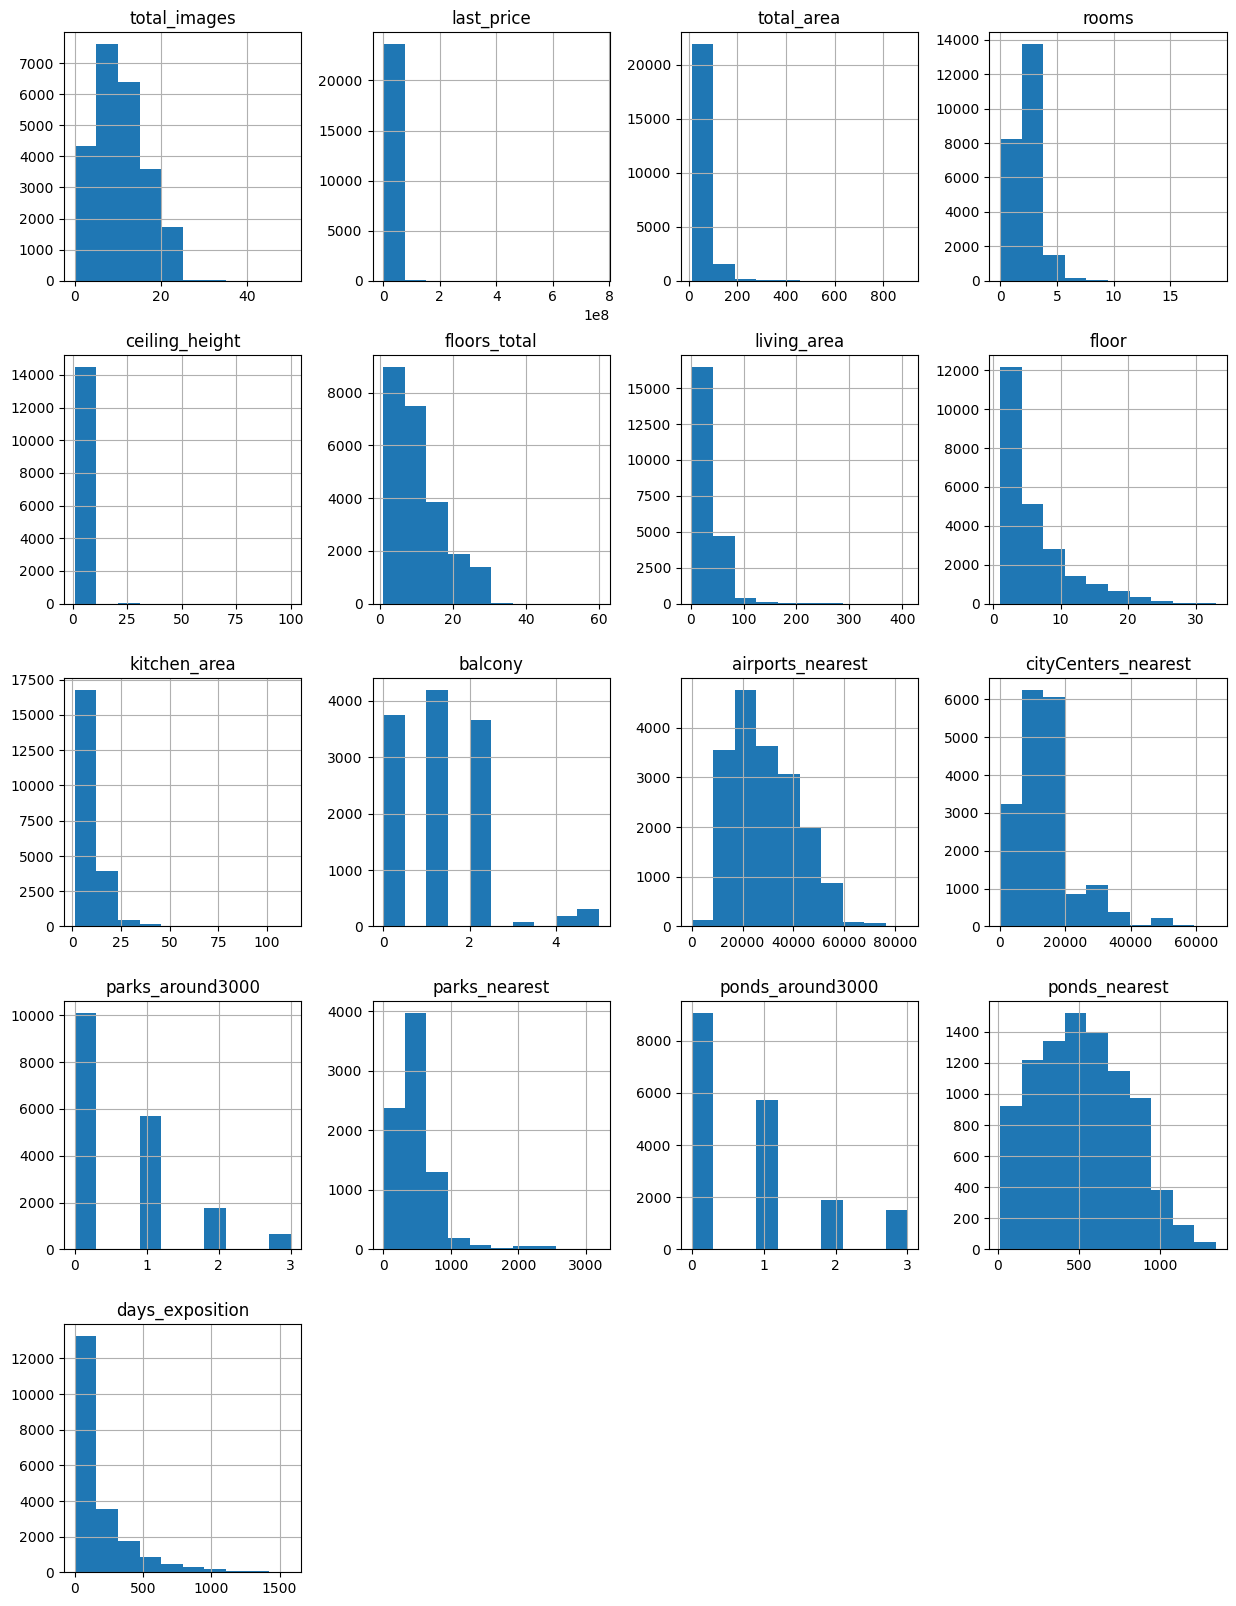

In [6]:
# Plot histograms for all data categories
data.hist(figsize=(15, 20))

**Conclusion**
The dataset contains a significant number of missing values and inconsistencies in column naming styles. Additionally, the large spread in some columns may indicate high variance and potential outliers.

### Perform data preprocessing

In [7]:
# Correct column names to follow a more consistent and stylistically appropriate format
data = data.rename(columns={
    'studio': 'is_studio',
    'open_plan': 'is_open_plan',
    'cityCenters_nearest': 'city_centers_nearest',
    'parks_around3000': 'parks_around_3000m',
    'ponds_around3000': 'ponds_around_3000m'
}
)

In [8]:
# Identify which columns contain missing values and determine their count
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000m       5518
parks_nearest           15620
ponds_around_3000m       5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

The output of the table indicates the presence of missing values in the following columns:
`ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `city_centers_nearest`, `parks_around_3000m`, `parks_nearest`, `ponds_around_3000m`, `ponds_nearest`, and `days_exposition`.
A total of 14 columns contain missing values.

**Determine the proportion of missing values in each column and eliminate them where possible**

**ceiling_height** — ceiling height (in meters)

In [9]:
print(f'Proportion of missing values {data["ceiling_height"].isna().mean():.2%}')

Proportion of missing values 38.80%


By examining this column in the descriptive statistics table, we can see that the maximum ceiling height is 100 meters and the minimum is 1 meter — which are clear outliers and distort the overall characteristics of this column.

Ceiling heights do vary, and many people might not even know the exact height of their ceilings.
Therefore, it would be reasonable to fill in the missing values with the median value of this column.

In [10]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

<ipython-input-10-7efe606fd50e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)


**floors_total** — total number of floors in the building

In [11]:
print(f'Proportion of missing values {data["floors_total"].isna().mean():.2%}')

Proportion of missing values 0.36%


The proportion of missing values is small; in this case, we can safely remove the rows with missing values.

In [12]:
data.dropna(subset=['floors_total'], inplace=True)

**living_area** — living area in square meters (m²)


In [13]:
print(f'Proportion of missing values {data["living_area"].isna().mean():.2%}')

Proportion of missing values 7.92%


 **is_apartment** — whether the property is an apartment

In [14]:
print(f'Proportion of missing values {data["is_apartment"].isna().mean():.2%}')

Proportion of missing values 88.25%


Since we are analyzing apartment sale listings and apartments (апартаменты) are not classified as residential real estate, users might have left this field blank when listing a regular apartment. Therefore, the missing values could simply indicate that the property is a standard apartment, not a commercial unit.

In [15]:
# Check for unique values in the column with the highest number of missing values — is_apartment
data['is_apartment'].value_counts()

is_apartment
False    2725
True       50
Name: count, dtype: int64

In [16]:
# Get the set of all unique values in the is_apartment column
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [17]:
# Replace NaN values with False (not an apartment)

# And convert the data type to int64 for further work with visualizations
data['is_apartment'] = data['is_apartment'].fillna(False).astype('int64')

<ipython-input-17-fc16b171c8ed>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False).astype('int64')


In [18]:
# Perform a check and display the unique values of the is_apartment column and its data type
print(data['is_apartment'].value_counts())
print(data['is_apartment'].dtype)

is_apartment
0    23563
1       50
Name: count, dtype: int64
int64


**kitchen_area** — kitchen area in square meters (m²)

In [19]:
print(f'Proportion of missing values {data["kitchen_area"].isna().mean():.2%}')

Proportion of missing values 9.45%


In [20]:
# Fill missing values in the kitchen_area column with the median
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)

<ipython-input-20-86078f06554c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)


**balcony** — number of balconies

In [21]:
print(f'Proportion of missing values {data["balcony"].isna().mean():.2%}')

Proportion of missing values 48.62%


In [22]:
# Check for unique values in the balcony column and find out how many there are
data['balcony'].value_counts()

balcony
1.0    4195
0.0    3713
2.0    3657
5.0     304
4.0     183
3.0      81
Name: count, dtype: int64

In [23]:
# Get the set of all unique values in the balcony column
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [24]:
# Replace NaN values with 0 and change the data type to int64, since the number of balconies is an integer value
data['balcony'] = data['balcony'].fillna(0).astype('int64')

In [25]:
# Perform a check and display the unique values of the balcony column and its data type
print(data['balcony'].unique())
print(data['balcony'].dtype)

[0 2 1 5 4 3]
int64


**locality_name** — name of the locality


In [26]:
print(f'Proportion of missing values {data["locality_name"].isna().mean():.2%}')

Proportion of missing values 0.20%


**airports_nearest** — distance to the nearest airport in meters (m)


In [27]:
print(f'Proportion of missing values {data["airports_nearest"].isna().mean():.2%}')

Proportion of missing values 23.43%


Since the data includes a large number of various settlements and villages located in the Leningrad region, it's likely that people simply did not specify the distance to the airport because it is quite large.

**city_centers_nearest** — distance to the city center (in meters)

In [28]:
print(f'Proportion of missing values {data["city_centers_nearest"].isna().mean():.2%}')

Proportion of missing values 23.33%


A similar situation is likely here as in the previous case — many properties are located far from the city center, especially in rural areas, so the distance may have been left unspecified.

**parks_around_3000m** — number of parks within a 3 km radius

In [29]:
print(f'Proportion of missing values {data["parks_around_3000m"].isna().mean():.2%}')

Proportion of missing values 23.33%


It can be assumed that people who don’t have any parks within a 3 km radius simply chose not to specify this information.

**parks_nearest** — distance to the nearest park (in meters)


In [30]:
print(f'Proportion of missing values {data["parks_nearest"].isna().mean():.2%}')

Proportion of missing values 65.93%


There is a large number of missing values. As with the cases of distance to the airport and to the city center, people might simply not know the distance to the nearest park.

**ponds_around_3000m** — number of ponds within a 3 km radius

In [31]:
print(f'Proportion of missing values {data["ponds_around_3000m"].isna().mean():.2%}')

Proportion of missing values 23.33%


It can be assumed that people who don’t have any ponds within a 3 km radius chose not to specify this information.

**ponds_nearest** — distance to the nearest pond (in meters)

In [32]:
print(f'Proportion of missing values {data["ponds_nearest"].isna().mean():.2%}')

Proportion of missing values 61.63%


There is a very high proportion of missing values. People may simply not know the distance to the nearest pond.

**days_exposition** — number of days the listing was active (from publication to removal)

In [33]:
print(f'Proportion of missing values {data["days_exposition"].isna().mean():.2%}')

Proportion of missing values 13.43%


The missing values may be due to listings that were posted recently and have been active for less than a day.

**Check the number of missing values at this point**

In [34]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around_3000m       5508
parks_nearest           15568
ponds_around_3000m       5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

We eliminated a significant number of missing values where it was feasible. The missing values in the columns *parks_around3000m*, *ponds_around3000m*, *parks_nearest*, and *ponds_nearest* were left unfilled, as attempting to restore them without logical validation could lead to inconsistencies in the data.

**Each column has been assigned the correct data type**

In [35]:
data = data.astype({'is_studio': 'int64', 'is_open_plan': 'int64', 'floors_total': 'int64'})

We converted the data type of the *is_studio* and *is_open_plan* columns from `bool` to `int64` to facilitate further work with visualizations. Additionally, the data type of the *floors_total* column was changed to `int64`, since the number of floors cannot be a fractional value.


**Remove implicit duplicates from the table**

In [36]:
# Find all unique values in the locality_name column
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

The values in the column contain both "поселок" and "посёлок", which can lead to duplicates. We'll replace "ё" with "е" to unify the spelling. Additionally, the column includes various names for settlements such as "поселок", "поселок городского типа", and "городской поселок". We'll standardize all of these to a single term — "поселок".

In [37]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].replace(['городской поселок', 'поселок городского типа', 'поселок станции', 'поселок при железнодорожной станции', 'коттеджный поселок'], 'поселок', regex=True)
print(data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'поселок Янино-1' 'поселок Парголово'
 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'поселок Красный Бор' 'Гатчина'
 'деревня Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'поселок Металлострой' 'поселок Лебяжье'
 'поселок Сиверский' 'поселок Молодцово' 'поселок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'поселок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'поселок Романовка' 'поселок Бугры' 'поселок Рощино' 'Кириши'
 'Луга' 'Волосово'

Convert the values in the *first_day_exposition* column to the `datetime` data type

In [38]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

**Handle rare and outlier values**

In [39]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,is_open_plan,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000m,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition
count,"23,613.0","23,613.0","23,613.0",23613,"23,613.0","23,613.0","23,613.0","21,743.0","23,613.0","23,613.0",...,"23,613.0","23,613.0","23,613.0","18,081.0","18,104.0","18,105.0","8,045.0","18,105.0","9,061.0","20,441.0"
mean,9.9,"6,540,555.5",60.3,2017-11-09 06:29:41.018930176,2.1,2.7,10.7,34.5,5.9,0.0,...,0.0,10.4,0.6,"28,788.0","14,185.1",0.6,490.6,0.8,518.2,180.9
min,0.0,"12,190.0",12.0,2014-11-27 00:00:00,0.0,1.0,1.0,2.0,1.0,0.0,...,0.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,400,000.0",40.0,2017-05-15 00:00:00,1.0,2.6,5.0,18.6,2.0,0.0,...,0.0,7.3,0.0,"18,575.0","9,233.8",0.0,288.0,0.0,294.0,45.0
50%,9.0,"4,650,000.0",52.0,2017-12-12 00:00:00,2.0,2.6,9.0,30.0,4.0,0.0,...,0.0,9.1,0.0,"26,726.0","13,093.0",0.0,455.0,1.0,503.0,95.0
75%,14.0,"6,799,000.0",69.8,2018-08-25 00:00:00,3.0,2.7,16.0,42.3,8.0,0.0,...,0.0,11.4,1.0,"37,242.0","16,287.0",1.0,612.0,1.0,730.0,232.0
max,50.0,"763,000,000.0",900.0,2019-05-03 00:00:00,19.0,100.0,60.0,409.7,33.0,1.0,...,1.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"
std,5.7,"10,901,722.7",35.6,NaN,1.1,1.0,6.6,22.0,4.9,0.0,...,0.1,5.6,1.0,"12,626.2","8,614.1",0.8,341.3,0.9,277.9,219.7


In [40]:
data = data.query("last_price <= 2.7e7").reset_index(drop=True)
data = data.query("total_area <= 230").reset_index(drop=True)
data = data.query("rooms <= 8").reset_index(drop=True)
data = data.query("2 <= ceiling_height <= 5").reset_index(drop=True)
data = data.query("floors_total <= 37").reset_index(drop=True)
data = data.query("living_area >= 5").reset_index(drop=True)
data = data.query("kitchen_area >= 4").reset_index(drop=True)

**Conclusion:**
 The dataset contained missing values and outliers. Some of the missing values were filled using median values or logical assumptions, while others were left untouched to preserve data integrity. Anomalies were addressed using filters in a way that minimized data loss. Duplicate entries in locality names were also corrected.

### Add new columns to the table

**Add new parameters to the table:**

* price per square meter;
* day of the week the listing was published (0 = Monday, 1 = Tuesday, etc.);
* month of publication;
* year of publication;
* apartment floor type (values: "first", "last", "other");
* distance to the city center in kilometers.


In [41]:
data['one_meter_price'] =round(data['last_price']/data['total_area'], 2)
data['publication_day'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year
def floor_type(row):
    try:
        if row['floor'] == 1:
            return 'first'
        elif row['floor'] == row['floors_total']:
            return 'top floor'
        elif 1 < row['floor'] < row['floors_total']:
            return 'another'
        else:
            return 'error'
    except:
        return 'error'
data['floor_type'] = data.apply(floor_type, axis=1)
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [42]:
data.head(10) # Display the first 10 rows of the table on the screen

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000m,ponds_nearest,days_exposition,one_meter_price,publication_day,publication_month,publication_year,floor_type,city_centers_nearest_km
0,20,"13,000,000.0",108.0,2019-03-07,3,2.7,16,51.0,8,0,...,482.0,2.0,755.0,NaN,"120,370.4",3,3,2019,another,16.0
1,7,"3,350,000.0",40.4,2018-12-04,1,2.6,11,18.6,1,0,...,NaN,0.0,NaN,81.0,"82,920.8",1,12,2018,first,19.0
2,10,"5,196,000.0",56.0,2015-08-20,2,2.6,5,34.3,4,0,...,90.0,2.0,574.0,558.0,"92,785.7",3,8,2015,another,14.0
3,2,"10,000,000.0",100.0,2018-06-19,2,3.0,14,32.0,13,0,...,112.0,1.0,48.0,121.0,"100,000.0",1,6,2018,another,8.0
4,10,"2,890,000.0",30.4,2018-09-10,1,2.6,12,14.4,5,0,...,NaN,NaN,NaN,55.0,"95,065.8",0,9,2018,another,NaN
5,6,"3,700,000.0",37.3,2017-11-02,1,2.6,26,10.6,6,0,...,NaN,0.0,NaN,155.0,"99,195.7",3,11,2017,another,19.0
6,20,"2,900,000.0",33.2,2018-05-23,1,2.6,27,15.4,26,0,...,NaN,NaN,NaN,189.0,"87,454.8",2,5,2018,another,NaN
7,18,"5,400,000.0",61.0,2017-02-26,3,2.5,9,43.6,7,0,...,NaN,0.0,NaN,289.0,"88,524.6",6,2,2017,another,15.0
8,5,"5,050,000.0",39.6,2017-11-16,1,2.7,12,20.3,3,0,...,310.0,2.0,553.0,137.0,"127,525.2",3,11,2017,another,14.0
9,9,"3,300,000.0",44.0,2018-08-27,2,2.6,5,31.0,4,0,...,NaN,0.0,NaN,7.0,"75,000.0",0,8,2018,another,52.0


Everything looks good — the new columns have been successfully added to the table.

### Perform exploratory data analysis (EDA)

**Explore and describe the following parameters:**

* total area;
* living area;
* kitchen area;
* property price;
* number of rooms;
* ceiling height;
* apartment floor type (“first”, “last”, “other”);
* total number of floors in the building;
* distance to the city center in meters;
* distance to the nearest park.

In [43]:
def show_info(data, column):
    #вычисление данных для статистики
    print(f'Statistics for {column}:')
    print(f'Sum of values in the column: {data[column].count()}')
    print(f'Minimum value: {data[column].min()}')
    print(f'Maximum value: {data[column].max()}')
    print(f'Median: {data[column].median()}')
    print(f'Mean value: {round(data[column].mean(), 2)}')

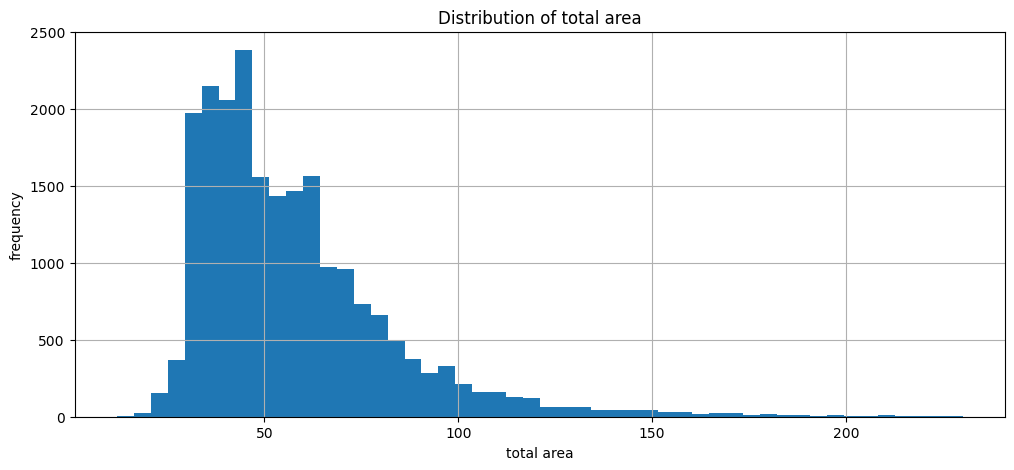

Statistics for total_area:
Sum of values in the column: 21296
Minimum value: 12.0
Maximum value: 230.0
Median: 51.2
Mean value: 57.5


In [44]:
data['total_area'].hist(bins=50, figsize=(12, 5))
plt.title('Distribution of total area')
plt.xlabel('total area')
plt.ylabel('frequency')
plt.show()

show_info(data, 'total_area')

Poisson distribution

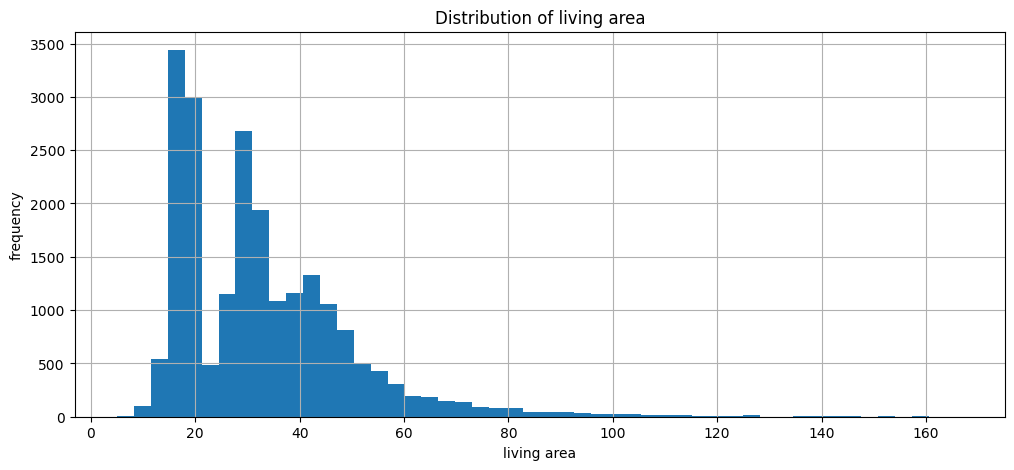

Statistics for living_area:
Sum of values in the column: 21296
Minimum value: 5.0
Maximum value: 167.0
Median: 30.0
Mean value: 32.99


In [45]:
data['living_area'].hist(bins=50, figsize=(12, 5))
plt.title('Distribution of living area')
plt.xlabel('living area')
plt.ylabel('frequency')
plt.show()

show_info(data, 'living_area')

Poisson-like distribution with two distinct peaks.
The peak around 30 likely results from filling in missing values with the median.
However, the peak at 18–20 is particularly interesting

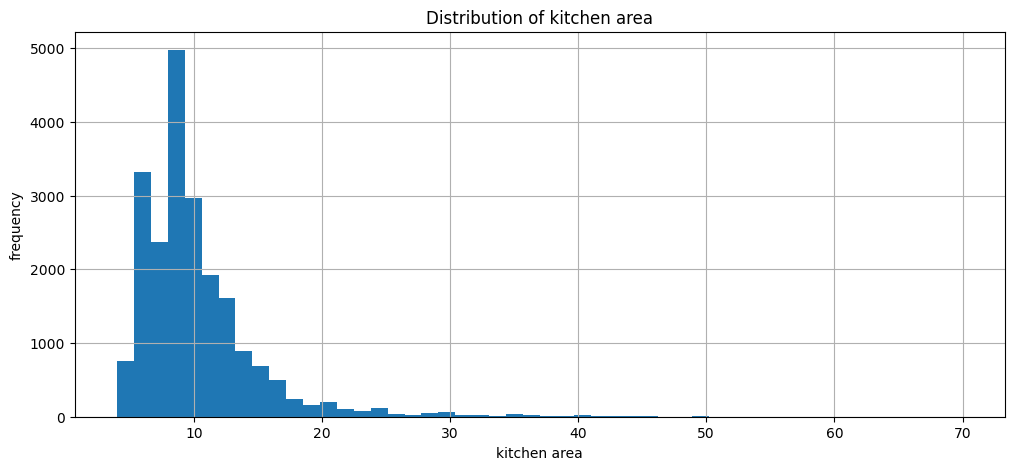

Statistics for kitchen_area:
Sum of values in the column: 21296
Minimum value: 4.0
Maximum value: 70.0
Median: 9.1
Mean value: 10.18


In [46]:
data['kitchen_area'].hist(bins=50, figsize=(12, 5))
plt.title('Distribution of kitchen area')
plt.xlabel('kitchen area')
plt.ylabel('frequency')
plt.show()

show_info(data, 'kitchen_area')

Poisson-like distribution with a distinct peak, which is likely due to filling missing values with the median.

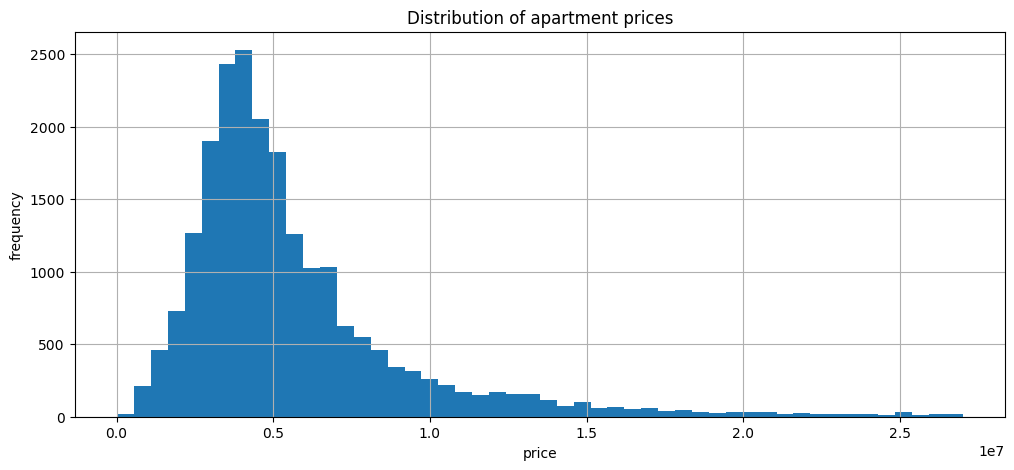

Statistics for last_price:
Sum of values in the column: 21296
Minimum value: 12190.0
Maximum value: 27000000.0
Median: 4600000.0
Mean value: 5637336.57


In [47]:
data['last_price'].hist(bins=50, figsize=(12, 5))
plt.title('Distribution of apartment prices')
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

show_info(data, 'last_price')

Poisson distribution

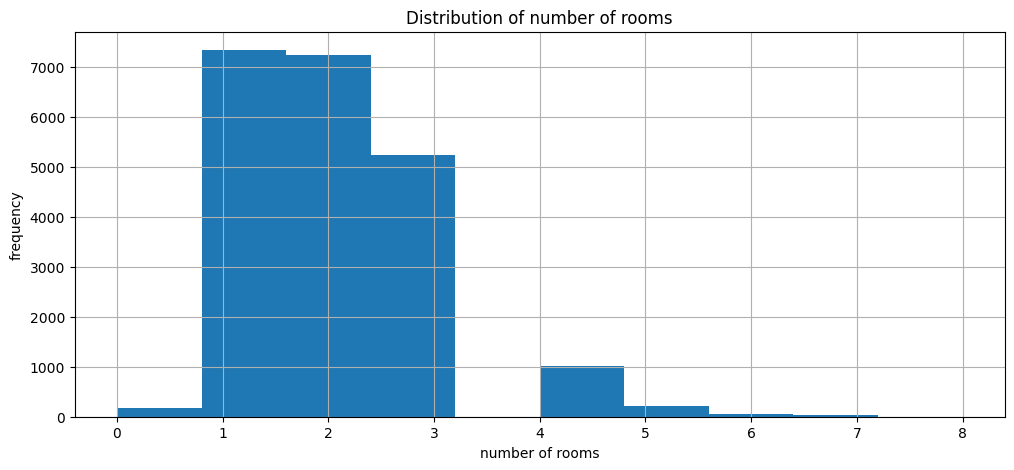

Statistics for rooms:
Sum of values in the column: 21296
Minimum value: 0
Maximum value: 8
Median: 2.0
Mean value: 2.03


In [48]:
data['rooms'].hist(figsize=(12, 5))
plt.title('Distribution of number of rooms')
plt.xlabel('number of rooms')
plt.ylabel('frequency')
plt.show()

show_info(data, 'rooms')

It's strange that someone indicated the number of rooms as zero.
This could possibly refer to a studio apartment, where the kitchen and living space are combined.

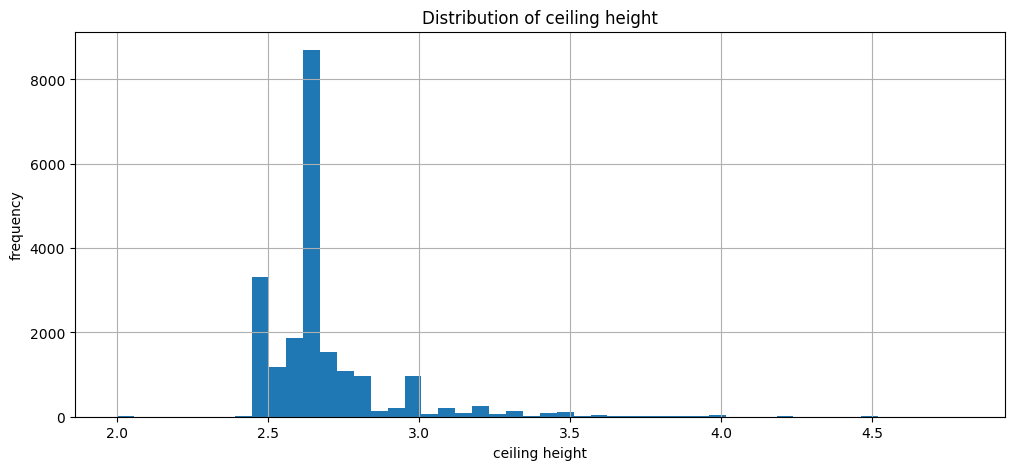

Statistics for ceiling_height:
Sum of values in the column: 21296
Minimum value: 2.0
Maximum value: 4.8
Median: 2.65
Mean value: 2.69


In [49]:
data['ceiling_height'].hist(bins=50, figsize=(12, 5))
plt.title('Distribution of ceiling height')
plt.xlabel('ceiling height')
plt.ylabel('frequency')
plt.show()

show_info(data, 'ceiling_height')

Everything looks fine here.

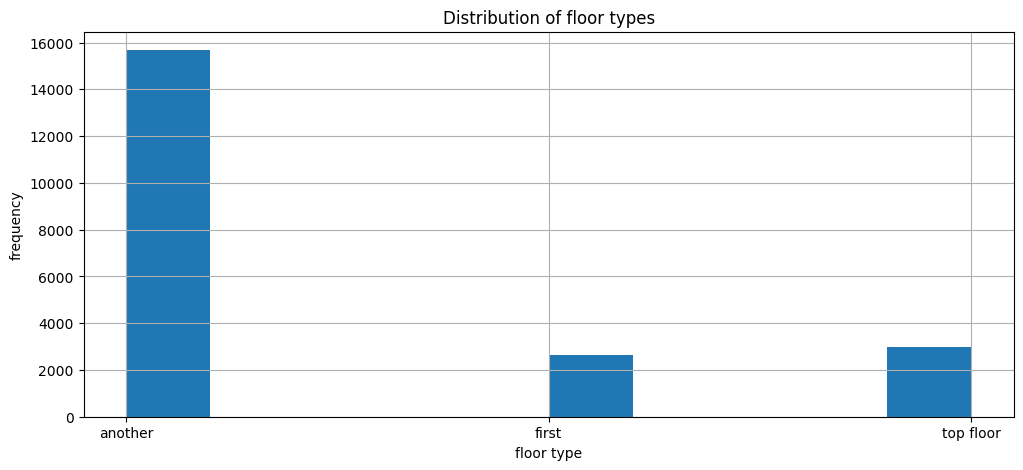

In [50]:
data['floor_type'].hist(figsize=(12, 5))
plt.title('Distribution of floor types')
plt.xlabel('floor type')
plt.ylabel('frequency')
plt.show()

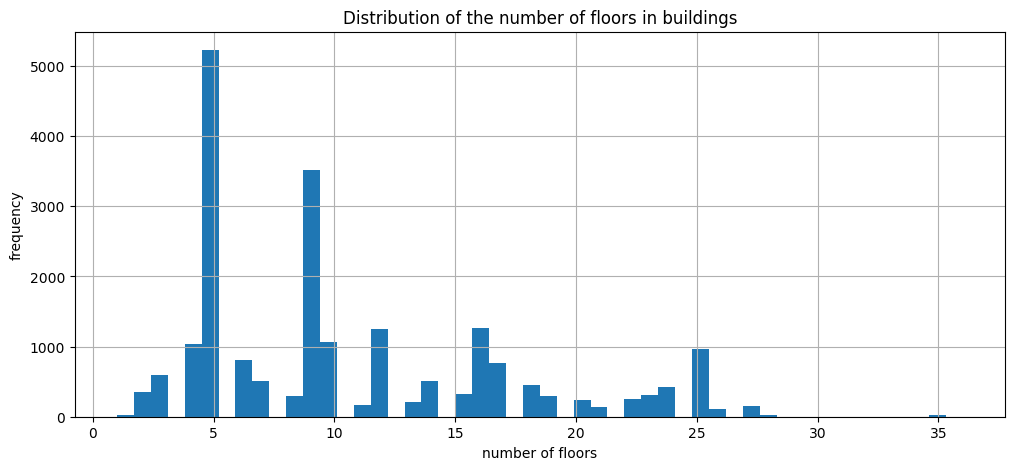

Statistics for floors_total:
Sum of values in the column: 21296
Minimum value: 1
Maximum value: 36
Median: 9.0
Mean value: 10.69


In [51]:
data['floors_total'].hist(bins=50, figsize=(12, 5))
plt.title('Distribution of the number of floors in buildings')
plt.xlabel('number of floors')
plt.ylabel('frequency')
plt.show()

show_info(data, 'floors_total')

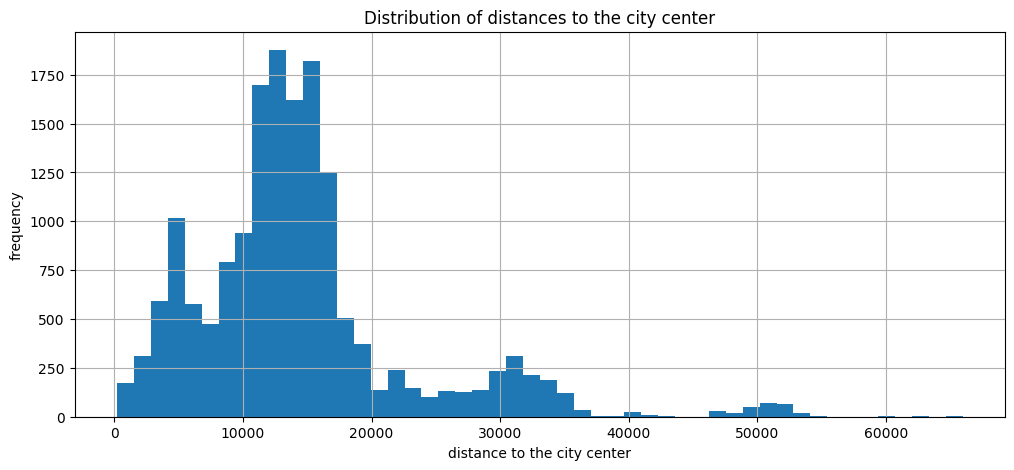

Statistics for city_centers_nearest:
Sum of values in the column: 16429
Minimum value: 208.0
Maximum value: 65968.0
Median: 13222.0
Mean value: 14419.97


In [52]:
data['city_centers_nearest'].hist(bins=50, figsize=(12, 5))
plt.title('Distribution of distances to the city center')
plt.xlabel('distance to the city center')
plt.ylabel('frequency')
plt.show()

show_info(data, 'city_centers_nearest')

There are three peaks: around 5 km, 15 km, and 31 km.

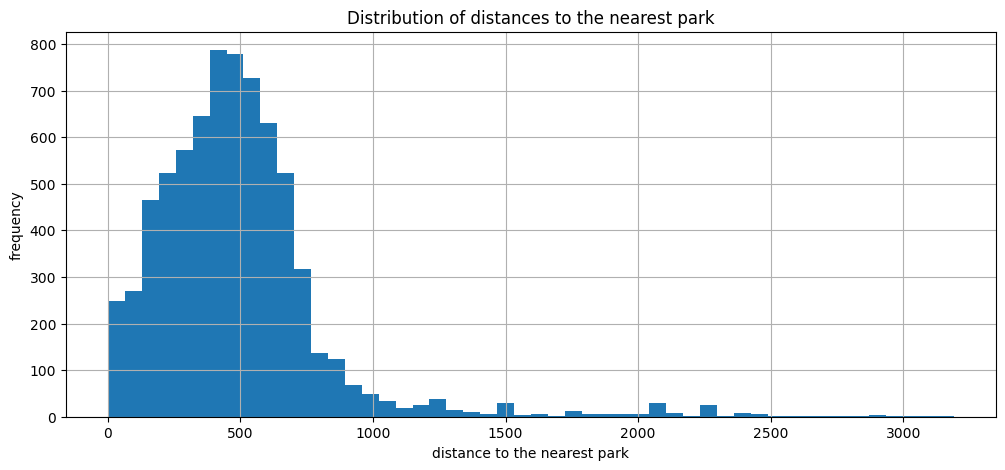

Statistics for parks_nearest:
Sum of values in the column: 7181
Minimum value: 1.0
Maximum value: 3190.0
Median: 456.0
Mean value: 491.39


In [53]:
data['parks_nearest'].hist(bins=50, figsize=(12, 5))
plt.title('Distribution of distances to the nearest park')
plt.xlabel('distance to the nearest park')
plt.ylabel('frequency')
plt.show()

show_info(data, 'parks_nearest')

Poisson distribution

**Let’s analyze how quickly apartments were sold:**

* build a histogram;
* calculate the mean and median;
* describe the typical selling duration and identify what counts as fast or unusually long sales.

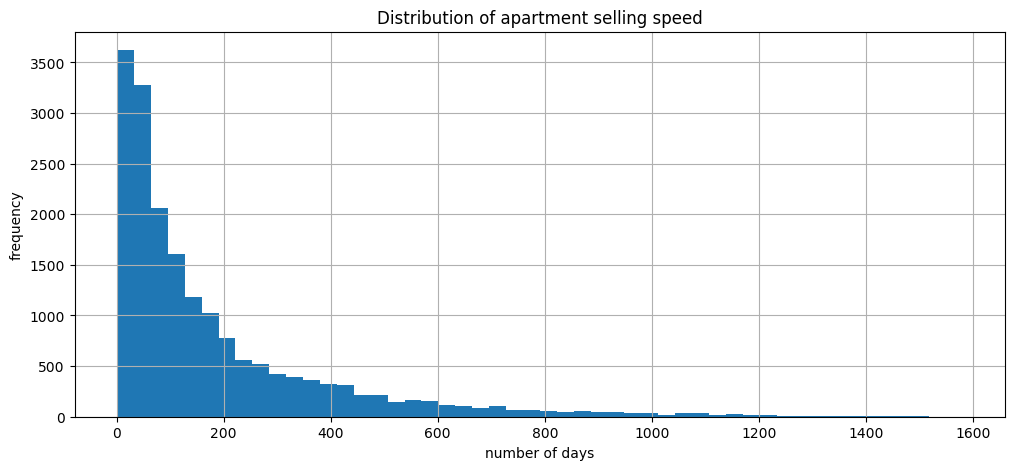

Average number of days to sell: 183.08
Median: 100.0


In [54]:
data['days_exposition'].hist(bins=50, figsize=(12, 5))
plt.title('Distribution of apartment selling speed')
plt.xlabel('number of days')
plt.ylabel('frequency')
plt.show()

print(f'Average number of days to sell: {data["days_exposition"].mean():.2f}')
print(f'Median: {data["days_exposition"].median()}')

Sales with durations below the median can be considered fast.
Sales lasting more than 200 days can be regarded as unusually long.


**Let’s identify the factors that most influence the total property price. We will build graphs showing the price dependence on the following parameters:**

* total area;
* living area;
* kitchen area;
* number of rooms;
* floor type where the apartment is located (first, last, other);
* listing date (day of the week, month, year).


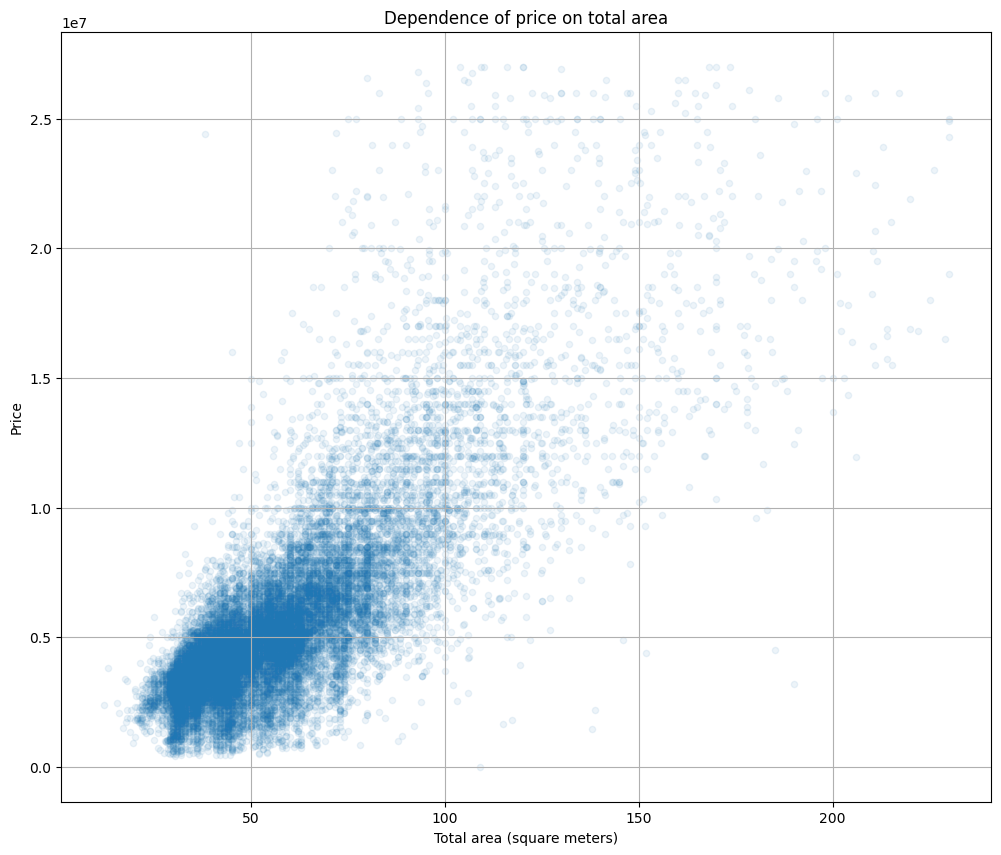

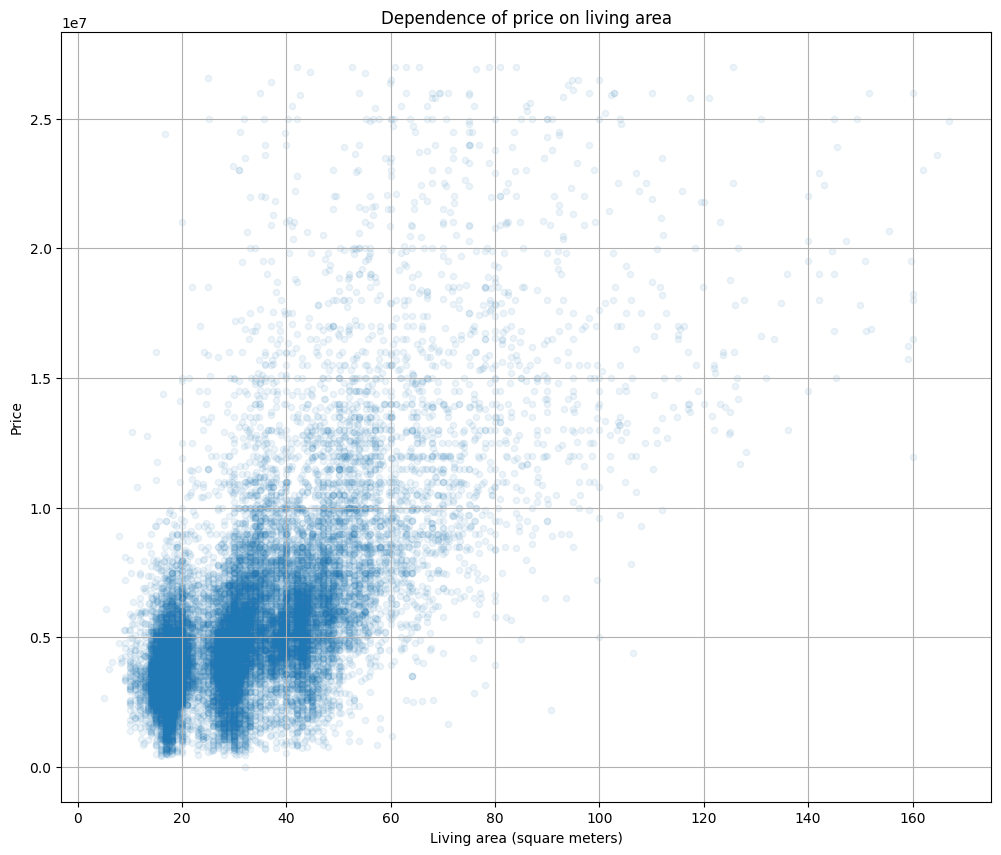

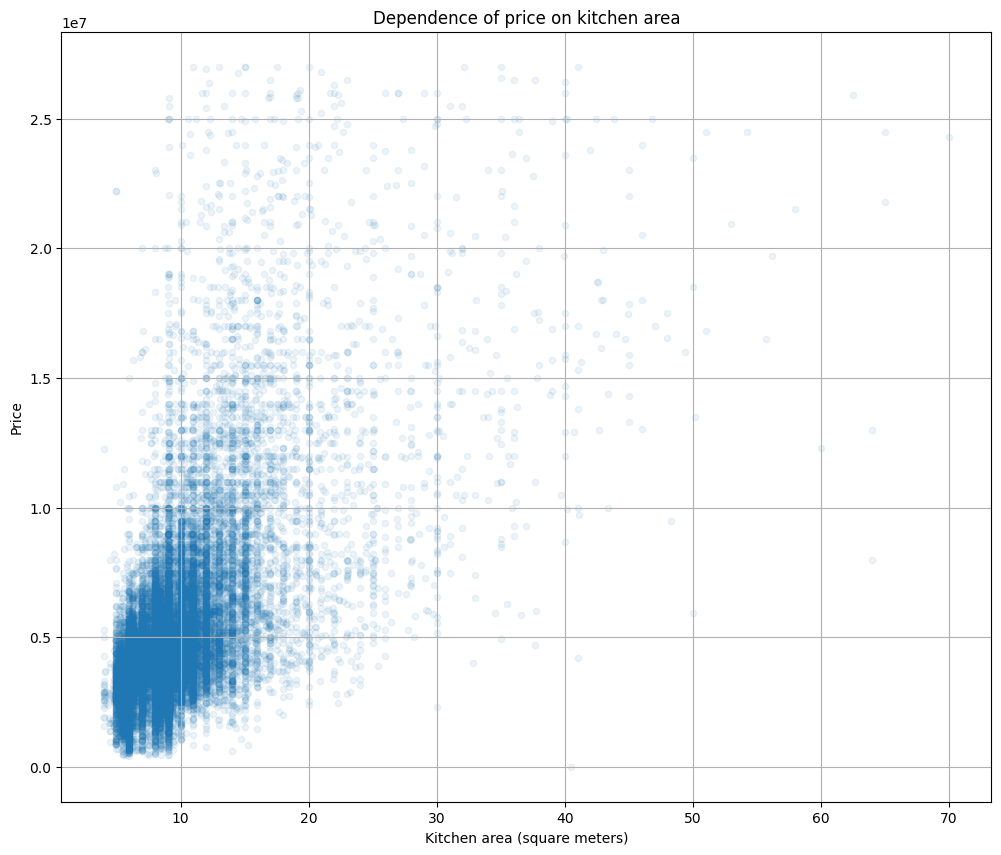

In [55]:
param_names = {
    'total_area': 'total area',
    'living_area': 'living area',
    'kitchen_area': 'kitchen area'
}

for parameter in ['total_area', 'living_area', 'kitchen_area']:
    data.plot(x=parameter, y='last_price', kind='scatter', alpha=0.08, figsize=(12, 10))
    plt.title(f'Dependence of price on {param_names[parameter]}')
    plt.xlabel(param_names[parameter].capitalize() + ' (square meters)')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [56]:
print(f'Correlation between apartment price and total area: {data["last_price"].corr(data["total_area"]):.2f}')
print(f'Correlation between apartment price and living area: {data["last_price"].corr(data["living_area"]):.2f}')
print(f'Correlation between apartment price and kitchen area: {data["last_price"].corr(data["kitchen_area"]):.2f}')

Correlation between apartment price and total area: 0.79
Correlation between apartment price and living area: 0.68
Correlation between apartment price and kitchen area: 0.59


The graphs clearly show that the apartment price increases with total area, living area, and kitchen area. As these areas grow, so does the property price.

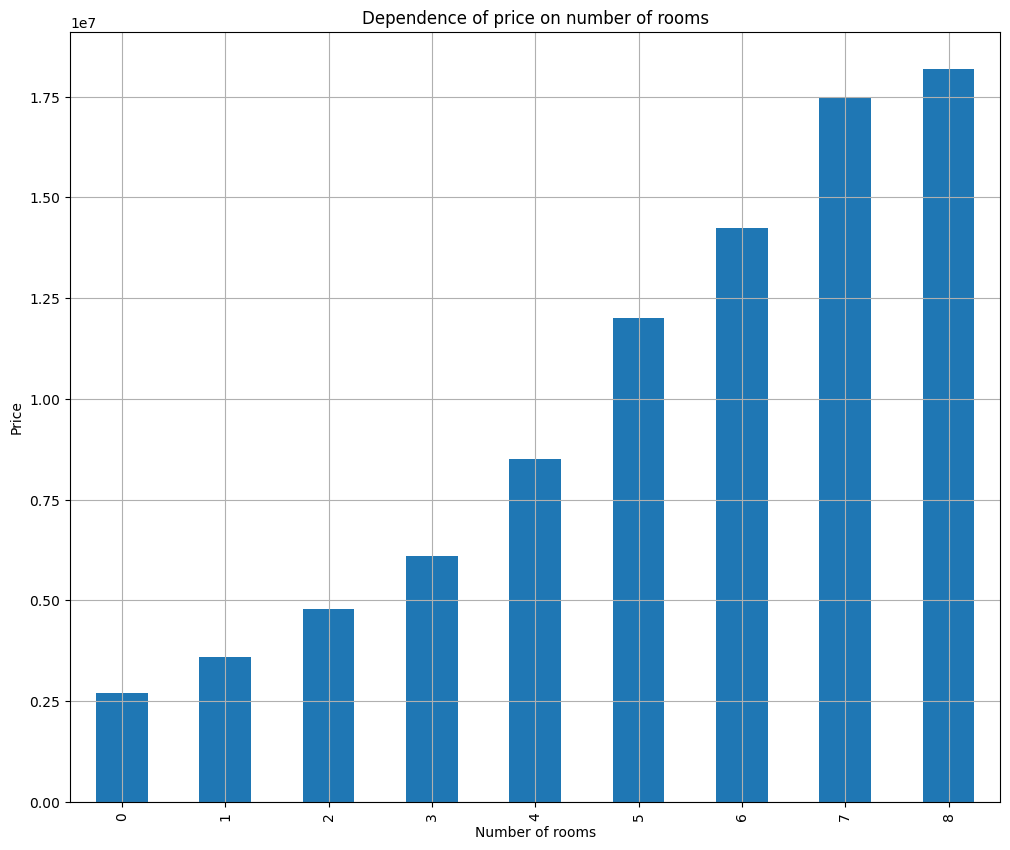

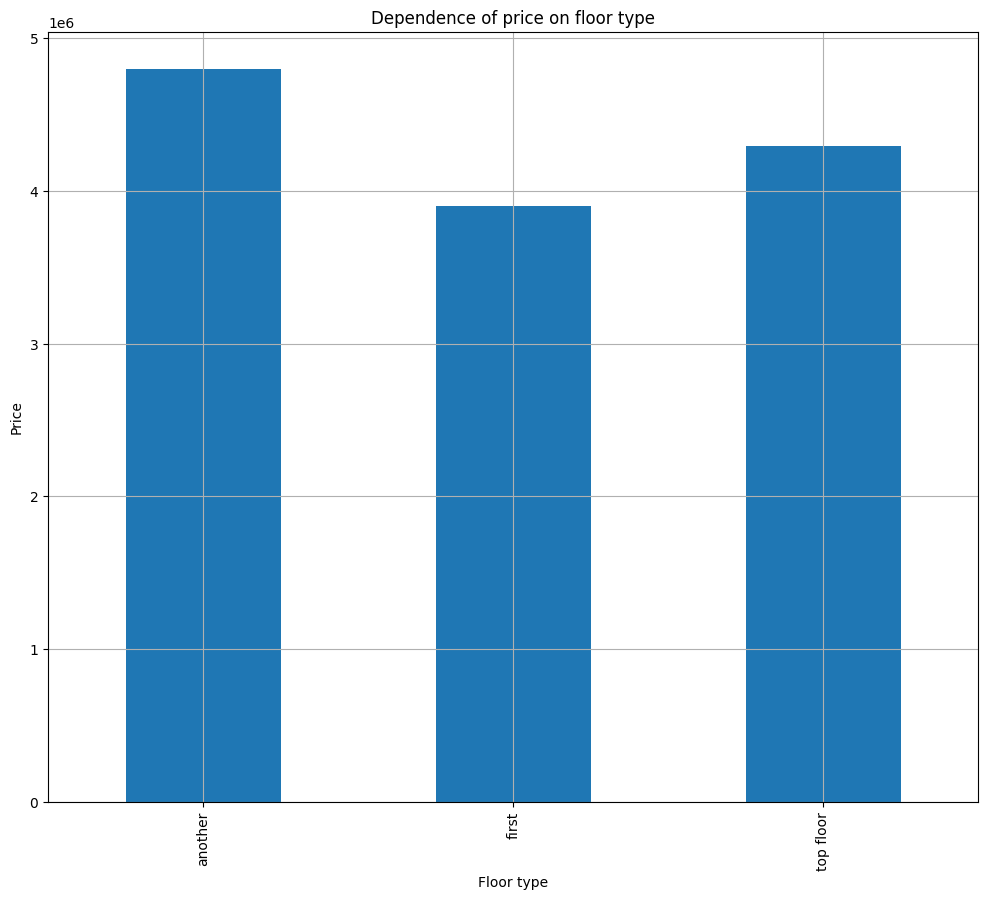

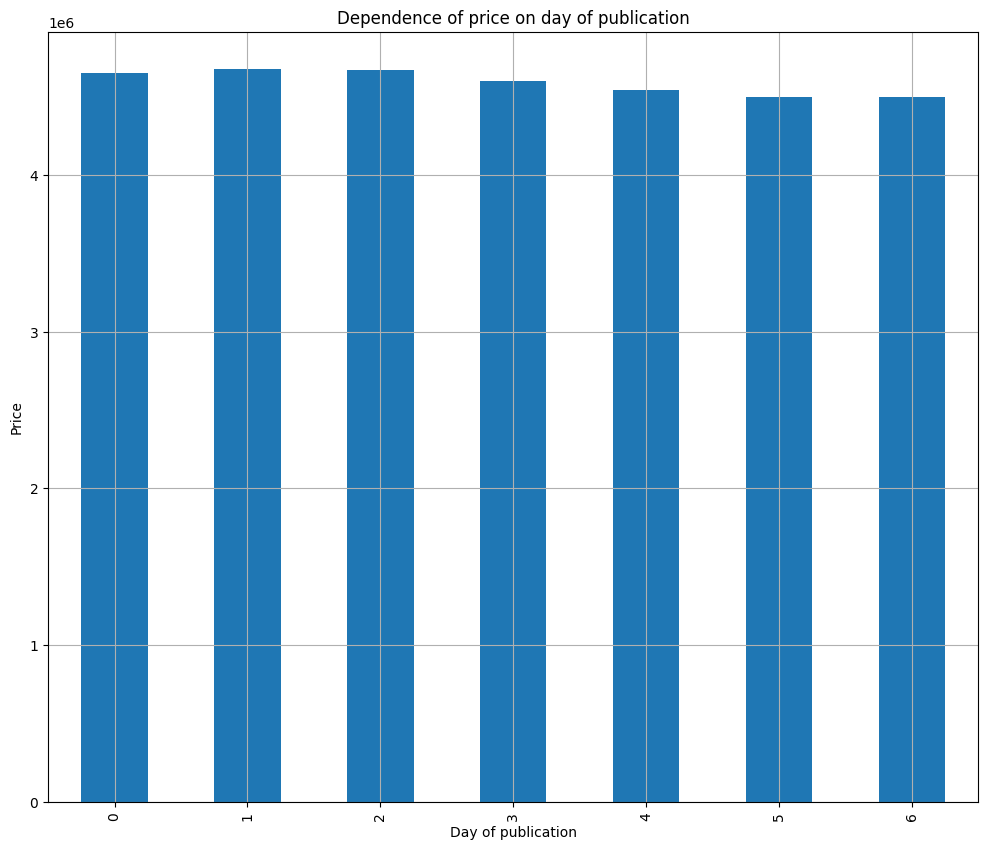

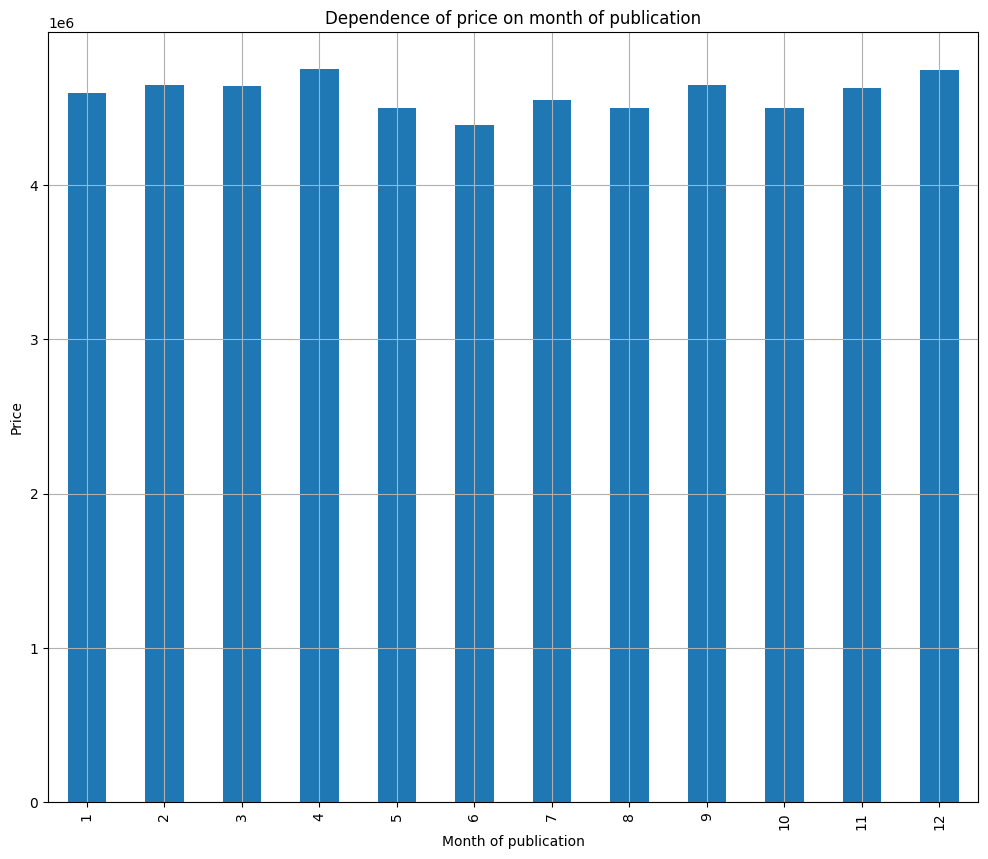

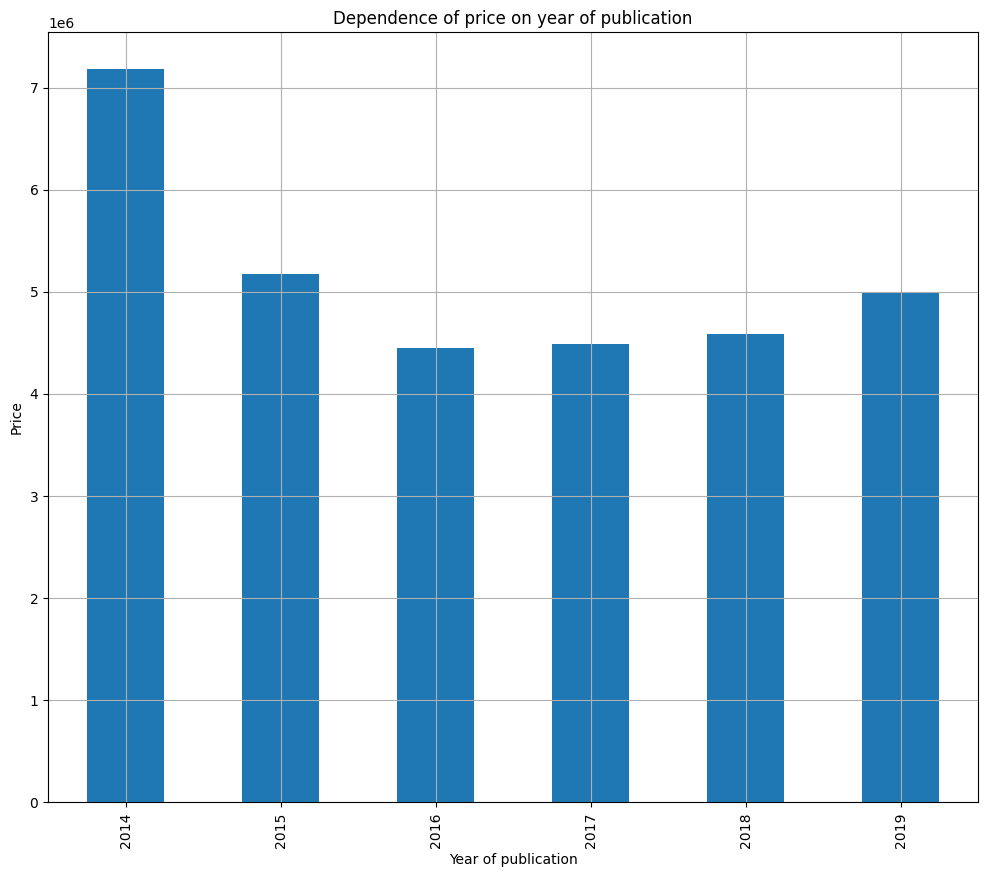

In [57]:
next_param_names = {
    'rooms': 'number of rooms',
    'floor_type': 'floor type',
    'publication_day': 'day of publication',
    'publication_month': 'month of publication',
    'publication_year': 'year of publication'
}

for  next_parameter in ['rooms', 'floor_type', 'publication_day', 'publication_month', 'publication_year']:
    data.groupby(next_parameter)['last_price'].median().plot(kind='bar', figsize=(12, 10))
    plt.title(f'Dependence of price on {next_param_names[next_parameter]}')
    plt.xlabel(next_param_names[next_parameter].capitalize())
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

Based on the obtained graphs, it is evident that:

* the number of rooms also affects the increase in apartment prices;
* properties on the first floor tend to be priced lower than those on other floors;
* the price does not depend on the day of the week or the month when the listing was published;
* between 2014 and 2016, real estate prices decreased, and from 2017 onwards, they gradually started to rise again.

**Average price per square meter in the 10 localities with the highest number of listings**

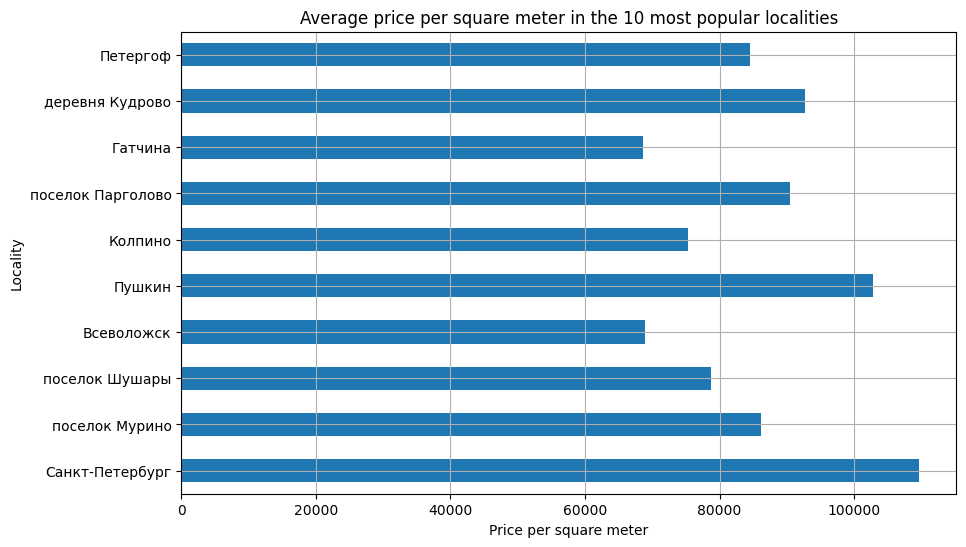

In [58]:
meter_price = data.pivot_table(index='locality_name', values='one_meter_price', aggfunc=['count', 'mean'])
meter_price.columns = ['count', 'mean']
top_10 = meter_price.sort_values(['count', 'mean'], ascending=False).head(10)

top_10['mean'].plot(kind='barh', figsize=(10, 6))
plt.title('Average price per square meter in the 10 most popular localities')
plt.xlabel('Price per square meter')
plt.ylabel('Locality')
plt.grid(True)
plt.show()

Saint Petersburg has the highest number of listings and the highest price per square meter.

**Average prices by distance from the city center in Saint Petersburg**

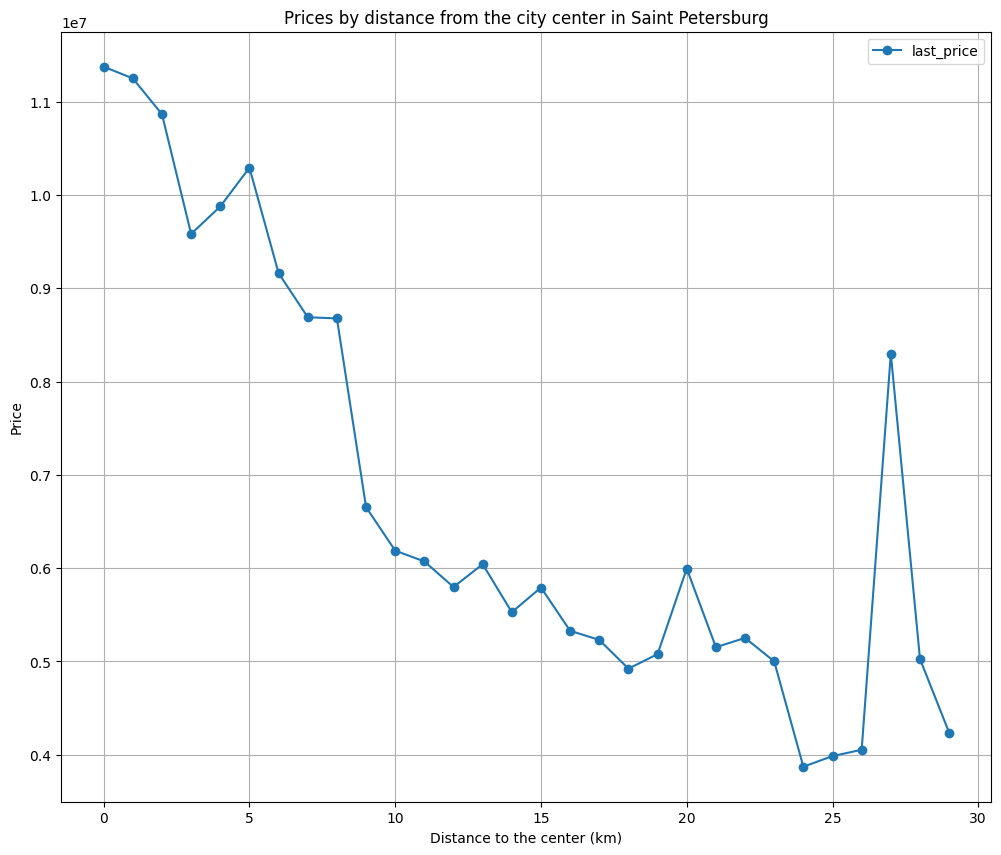

In [59]:
spb_flats = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
spb_flats.plot(figsize=(12,10), marker='o' ,linestyle='-')
plt.title('Prices by distance from the city center in Saint Petersburg')
plt.xlabel('Distance to the center (km)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

The most expensive real estate in Saint Petersburg is located within a 7 km radius of the city center, after which prices begin to decline. Additionally, there are peaks at 20 km and 27 km from the center, which may correspond to apartments in new districts or elite residential complexes.

### Conclusion
  According to the provided data, 5- and 9-story buildings predominate, most apartments have 1 or 2 rooms, and the ceiling height is about 2.65 meters.

  Apartment prices range from 2.5 million rubles to 6 million rubles. For the most part, the price depends on the area and number of rooms, the floor height (apartments on the first floor are cheaper), and proximity to Saint Petersburg: Murino, Kudrovo, Shushary are expensive options; Pargolovo, Gatchina, Vyborg are cheaper options (and within Saint Petersburg itself, the price depends on proximity to the city center: prices decrease at 6–7 km).

  It can be noted that in the apartment sales market (at least in the considered area) there is seasonality: a low season in December-January and summer, and a high season from August to November. In addition, there is a slight dependence on the day of the week: on weekdays, apartments with higher prices are listed, which means demand is higher.

  Since 2015, the real estate market declined, and the downturn lasted until 2017. Since 2017, the price per square meter has risen significantly, and people have become interested in apartments and flats smaller than 50 m².


### General conclusion

We studied and analyzed a dataset containing an archive of apartment sale listings in Saint Petersburg and neighboring localities over several years.

From the conducted analysis, it was established that the factors influencing property prices in Saint Petersburg and surrounding areas are:

* Total area
* Living area
* Kitchen area
* Number of rooms
* Floor type

Studying the properties located directly in Saint Petersburg, it was determined that the price depends not only on the factors listed above but also on the location relative to the city center. The closer to the center, the higher the price.